# Market Risk Project

## Question A : Value at Risk analysis using Kernel density

#### Importation of daily prices of the stock **Natixis** between January 2015 and December 2016

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The Natixis data is directly included here, so there's no need for a CSV or text file to execute the code.

In [60]:
natixis_data = """
02/01/2015	5,621
05/01/2015	5,424
06/01/2015	5,329
07/01/2015	5,224
08/01/2015	5,453
09/01/2015	5,34
12/01/2015	5,264
13/01/2015	5,4
14/01/2015	5,311
15/01/2015	5,42
16/01/2015	5,492
19/01/2015	5,635
20/01/2015	5,729
21/01/2015	5,764
22/01/2015	5,952
23/01/2015	5,902
26/01/2015	5,903
27/01/2015	5,781
28/01/2015	5,722
29/01/2015	5,739
30/01/2015	5,652
02/02/2015	5,675
03/02/2015	5,846
04/02/2015	5,786
05/02/2015	5,765
06/02/2015	5,852
09/02/2015	5,756
10/02/2015	5,894
11/02/2015	5,813
12/02/2015	5,933
13/02/2015	6,116
16/02/2015	6,085
17/02/2015	6,183
18/02/2015	6,257
19/02/2015	6,381
20/02/2015	6,343
23/02/2015	6,4
24/02/2015	6,405
25/02/2015	6,353
26/02/2015	6,445
27/02/2015	6,47
02/03/2015	6,506
03/03/2015	6,373
04/03/2015	6,418
05/03/2015	6,402
06/03/2015	6,434
09/03/2015	6,429
10/03/2015	6,358
11/03/2015	6,531
12/03/2015	6,553
13/03/2015	6,62
16/03/2015	6,725
17/03/2015	6,64
18/03/2015	6,561
19/03/2015	6,602
20/03/2015	6,721
23/03/2015	6,724
24/03/2015	6,784
25/03/2015	6,728
26/03/2015	6,647
27/03/2015	6,851
30/03/2015	6,988
31/03/2015	6,961
01/04/2015	7,084
02/04/2015	7,145
07/04/2015	7,239
08/04/2015	7,264
09/04/2015	7,397
10/04/2015	7,356
13/04/2015	7,404
14/04/2015	7,413
15/04/2015	7,43
16/04/2015	7,35
17/04/2015	7,168
20/04/2015	7,25
21/04/2015	7,361
22/04/2015	7,445
23/04/2015	7,535
24/04/2015	7,646
27/04/2015	7,744
28/04/2015	7,662
29/04/2015	7,278
30/04/2015	7,386
04/05/2015	7,373
05/05/2015	7,122
06/05/2015	7,13
07/05/2015	7,119
08/05/2015	7,25
11/05/2015	7,22
12/05/2015	6,98
13/05/2015	7,034
14/05/2015	7,15
15/05/2015	7,137
18/05/2015	7,075
19/05/2015	7,207
20/05/2015	7,248
21/05/2015	7,247
22/05/2015	6,964
25/05/2015	6,861
26/05/2015	6,822
27/05/2015	6,96
28/05/2015	6,923
29/05/2015	6,826
01/06/2015	6,779
02/06/2015	6,762
03/06/2015	6,734
04/06/2015	6,723
05/06/2015	6,623
08/06/2015	6,483
09/06/2015	6,492
10/06/2015	6,608
11/06/2015	6,583
12/06/2015	6,497
15/06/2015	6,335
16/06/2015	6,423
17/06/2015	6,305
18/06/2015	6,318
19/06/2015	6,437
22/06/2015	6,722
23/06/2015	6,791
24/06/2015	6,744
25/06/2015	6,768
26/06/2015	6,797
29/06/2015	6,469
30/06/2015	6,455
01/07/2015	6,551
02/07/2015	6,44
03/07/2015	6,381
06/07/2015	6,132
07/07/2015	6,121
08/07/2015	6,171
09/07/2015	6,476
10/07/2015	6,716
13/07/2015	6,9
14/07/2015	6,909
15/07/2015	6,989
16/07/2015	7,03
17/07/2015	7,047
20/07/2015	7,141
21/07/2015	7,081
22/07/2015	7,076
23/07/2015	7,053
24/07/2015	6,993
27/07/2015	6,771
28/07/2015	6,843
29/07/2015	6,812
30/07/2015	6,526
31/07/2015	6,691
03/08/2015	6,755
04/08/2015	6,651
05/08/2015	6,678
06/08/2015	6,644
07/08/2015	6,384
10/08/2015	6,416
11/08/2015	6,402
12/08/2015	6,232
13/08/2015	6,414
14/08/2015	6,313
17/08/2015	6,289
18/08/2015	6,32
19/08/2015	6,212
20/08/2015	5,884
21/08/2015	5,573
24/08/2015	5,405
25/08/2015	5,755
26/08/2015	5,624
27/08/2015	5,797
28/08/2015	5,718
31/08/2015	5,66
01/09/2015	5,548
02/09/2015	5,526
03/09/2015	5,732
04/09/2015	5,581
07/09/2015	5,568
08/09/2015	5,597
09/09/2015	5,604
10/09/2015	5,526
11/09/2015	5,448
14/09/2015	5,375
15/09/2015	5,41
16/09/2015	5,369
17/09/2015	5,453
18/09/2015	5,258
21/09/2015	5,275
22/09/2015	5,06
23/09/2015	4,989
24/09/2015	5,052
25/09/2015	5,228
28/09/2015	5,046
29/09/2015	4,819
30/09/2015	4,939
01/10/2015	4,906
02/10/2015	4,955
05/10/2015	5,108
06/10/2015	5,312
07/10/2015	5,542
08/10/2015	5,61
09/10/2015	5,674
12/10/2015	5,547
13/10/2015	5,459
14/10/2015	5,409
15/10/2015	5,419
16/10/2015	5,52
19/10/2015	5,509
20/10/2015	5,397
21/10/2015	5,386
22/10/2015	5,469
23/10/2015	5,638
26/10/2015	5,607
27/10/2015	5,579
28/10/2015	5,601
29/10/2015	5,508
30/10/2015	5,58
02/11/2015	5,53
03/11/2015	5,476
04/11/2015	5,509
05/11/2015	5,793
06/11/2015	5,937
09/11/2015	5,812
10/11/2015	5,764
11/11/2015	5,861
12/11/2015	5,704
13/11/2015	5,664
16/11/2015	5,605
17/11/2015	5,699
18/11/2015	5,686
19/11/2015	5,764
20/11/2015	5,6
23/11/2015	5,616
24/11/2015	5,569
25/11/2015	5,581
26/11/2015	5,719
27/11/2015	5,662
30/11/2015	5,74
01/12/2015	5,755
02/12/2015	5,631
03/12/2015	5,606
04/12/2015	5,448
07/12/2015	5,453
08/12/2015	5,21
09/12/2015	5,21
10/12/2015	5,088
11/12/2015	5,002
14/12/2015	4,828
15/12/2015	5,034
16/12/2015	5,048
17/12/2015	5,253
18/12/2015	5,166
21/12/2015	5,04
22/12/2015	5,133
23/12/2015	5,257
24/12/2015	5,291
28/12/2015	5,24
29/12/2015	5,265
30/12/2015	5,204
31/12/2015	5,217
04/01/2016	4,984
05/01/2016	5,012
06/01/2016	4,852
07/01/2016	4,691
08/01/2016	4,59
11/01/2016	4,517
12/01/2016	4,571
13/01/2016	4,577
14/01/2016	4,463
15/01/2016	4,26
18/01/2016	4,017
19/01/2016	4,163
20/01/2016	3,985
21/01/2016	4,16
22/01/2016	4,375
25/01/2016	4,26
26/01/2016	4,367
27/01/2016	4,308
28/01/2016	4,437
29/01/2016	4,515
01/02/2016	4,47
02/02/2016	4,208
03/02/2016	4,025
04/02/2016	4,162
05/02/2016	4,277
08/02/2016	4,083
09/02/2016	3,86
10/02/2016	4,101
11/02/2016	4,329
12/02/2016	4,409
15/02/2016	4,652
16/02/2016	4,709
17/02/2016	4,732
18/02/2016	4,632
19/02/2016	4,54
22/02/2016	4,739
23/02/2016	4,643
24/02/2016	4,521
25/02/2016	4,65
26/02/2016	4,869
29/02/2016	4,936
01/03/2016	5,06
02/03/2016	5,145
03/03/2016	5,202
04/03/2016	5,169
07/03/2016	5,011
08/03/2016	4,93
09/03/2016	4,9
10/03/2016	4,78
11/03/2016	5,083
14/03/2016	5,024
15/03/2016	4,903
16/03/2016	4,863
17/03/2016	4,752
18/03/2016	4,738
21/03/2016	4,716
22/03/2016	4,679
23/03/2016	4,574
24/03/2016	4,426
29/03/2016	4,377
30/03/2016	4,365
31/03/2016	4,327
01/04/2016	4,326
04/04/2016	4,322
05/04/2016	4,191
06/04/2016	4,24
07/04/2016	4,163
08/04/2016	4,289
11/04/2016	4,374
12/04/2016	4,437
13/04/2016	4,785
14/04/2016	4,771
15/04/2016	4,68
18/04/2016	4,672
19/04/2016	4,724
20/04/2016	4,871
21/04/2016	4,856
22/04/2016	4,898
25/04/2016	4,738
26/04/2016	4,893
27/04/2016	4,847
28/04/2016	4,908
29/04/2016	4,817
02/05/2016	4,726
03/05/2016	4,542
04/05/2016	4,402
05/05/2016	4,334
06/05/2016	4,361
09/05/2016	4,386
10/05/2016	4,083
11/05/2016	4,201
12/05/2016	4,134
13/05/2016	4,229
16/05/2016	4,207
17/05/2016	4,266
18/05/2016	4,351
19/05/2016	4,337
20/05/2016	4,4
23/05/2016	4,4
24/05/2016	4,577
25/05/2016	4,75
26/05/2016	4,752
27/05/2016	4,46
30/05/2016	4,4
31/05/2016	4,338
01/06/2016	4,296
02/06/2016	4,301
03/06/2016	4,22
06/06/2016	4,185
07/06/2016	4,319
08/06/2016	4,288
09/06/2016	4,208
10/06/2016	4,053
13/06/2016	3,904
14/06/2016	3,805
15/06/2016	3,816
16/06/2016	3,735
17/06/2016	3,912
20/06/2016	4,055
21/06/2016	4,073
22/06/2016	4,05
23/06/2016	4,15
24/06/2016	3,439
27/06/2016	3,27
28/06/2016	3,347
29/06/2016	3,377
30/06/2016	3,409
01/07/2016	3,388
04/07/2016	3,336
05/07/2016	3,165
06/07/2016	3,077
07/07/2016	3,149
08/07/2016	3,309
11/07/2016	3,342
12/07/2016	3,427
13/07/2016	3,311
14/07/2016	3,475
15/07/2016	3,458
18/07/2016	3,426
19/07/2016	3,437
20/07/2016	3,462
21/07/2016	3,462
22/07/2016	3,455
25/07/2016	3,419
26/07/2016	3,382
27/07/2016	3,534
28/07/2016	3,425
29/07/2016	3,685
01/08/2016	3,643
02/08/2016	3,422
03/08/2016	3,408
04/08/2016	3,458
05/08/2016	3,589
08/08/2016	3,62
09/08/2016	3,712
10/08/2016	3,813
11/08/2016	3,804
12/08/2016	3,782
15/08/2016	3,772
16/08/2016	3,745
17/08/2016	3,672
18/08/2016	3,644
19/08/2016	3,59
22/08/2016	3,665
23/08/2016	3,737
24/08/2016	3,796
25/08/2016	3,773
26/08/2016	3,813
29/08/2016	3,77
30/08/2016	3,872
31/08/2016	3,966
01/09/2016	3,991
02/09/2016	4,045
05/09/2016	3,976
06/09/2016	3,963
07/09/2016	3,976
08/09/2016	4,072
09/09/2016	4,086
12/09/2016	3,965
13/09/2016	3,929
14/09/2016	3,936
15/09/2016	3,98
16/09/2016	4,018
19/09/2016	4,041
20/09/2016	3,963
21/09/2016	4,124
22/09/2016	4,143
23/09/2016	4,148
26/09/2016	4,063
27/09/2016	4,034
28/09/2016	4,069
29/09/2016	4,101
30/09/2016	4,149
03/10/2016	4,113
04/10/2016	4,223
05/10/2016	4,34
06/10/2016	4,412
07/10/2016	4,44
10/10/2016	4,446
11/10/2016	4,415
12/10/2016	4,379
13/10/2016	4,255
14/10/2016	4,344
17/10/2016	4,365
18/10/2016	4,392
19/10/2016	4,404
20/10/2016	4,434
21/10/2016	4,441
24/10/2016	4,593
25/10/2016	4,591
26/10/2016	4,594
27/10/2016	4,692
28/10/2016	4,709
31/10/2016	4,605
01/11/2016	4,537
02/11/2016	4,424
03/11/2016	4,503
04/11/2016	4,369
07/11/2016	4,504
08/11/2016	4,622
09/11/2016	4,476
10/11/2016	4,558
11/11/2016	4,675
14/11/2016	4,708
15/11/2016	4,68
16/11/2016	4,602
17/11/2016	4,628
18/11/2016	4,633
21/11/2016	4,617
22/11/2016	4,745
23/11/2016	4,712
24/11/2016	4,72
25/11/2016	4,71
28/11/2016	4,64
29/11/2016	4,677
30/11/2016	4,752
01/12/2016	4,886
02/12/2016	4,825
05/12/2016	4,959
06/12/2016	5,093
07/12/2016	5,214
08/12/2016	5,374
09/12/2016	5,392
12/12/2016	5,494
13/12/2016	5,451
14/12/2016	5,346
15/12/2016	5,44
16/12/2016	5,365
19/12/2016	5,299
20/12/2016	5,382
21/12/2016	5,398
22/12/2016	5,42
23/12/2016	5,376
27/12/2016	5,38
28/12/2016	5,379
29/12/2016	5,328
30/12/2016	5,36
02/01/2017	5,4
03/01/2017	5,62
04/01/2017	5,641
05/01/2017	5,595
06/01/2017	5,563
09/01/2017	5,448
10/01/2017	5,485
11/01/2017	5,437
12/01/2017	5,438
13/01/2017	5,606
16/01/2017	5,577
17/01/2017	5,488
18/01/2017	5,451
19/01/2017	5,5
20/01/2017	5,495
23/01/2017	5,355
24/01/2017	5,415
25/01/2017	5,689
26/01/2017	5,65
27/01/2017	5,64
30/01/2017	5,564
31/01/2017	5,485
01/02/2017	5,579
02/02/2017	5,569
03/02/2017	5,57
06/02/2017	5,509
07/02/2017	5,399
08/02/2017	5,228
09/02/2017	5,327
10/02/2017	5,45
13/02/2017	5,479
14/02/2017	5,52
15/02/2017	5,64
16/02/2017	5,601
17/02/2017	5,497
20/02/2017	5,393
21/02/2017	5,336
22/02/2017	5,301
23/02/2017	5,246
24/02/2017	5,15
27/02/2017	5,17
28/02/2017	5,151
01/03/2017	5,361
02/03/2017	5,374
03/03/2017	5,528
06/03/2017	5,435
07/03/2017	5,41
08/03/2017	5,435
09/03/2017	5,567
10/03/2017	5,659
13/03/2017	5,663
14/03/2017	5,613
15/03/2017	5,66
16/03/2017	5,667
17/03/2017	5,668
20/03/2017	5,632
21/03/2017	5,628
22/03/2017	5,579
23/03/2017	5,64
24/03/2017	5,591
27/03/2017	5,563
28/03/2017	5,671
29/03/2017	5,678
30/03/2017	5,723
31/03/2017	5,776
03/04/2017	5,689
04/04/2017	5,65
05/04/2017	5,662
06/04/2017	5,706
07/04/2017	5,75
10/04/2017	5,697
11/04/2017	5,626
12/04/2017	5,544
13/04/2017	5,41
18/04/2017	5,419
19/04/2017	5,538
20/04/2017	5,702
21/04/2017	5,793
24/04/2017	6,316
25/04/2017	6,348
26/04/2017	6,404
27/04/2017	6,358
28/04/2017	6,387
02/05/2017	6,44
03/05/2017	6,423
04/05/2017	6,485
05/05/2017	6,576
08/05/2017	6,464
09/05/2017	6,445
10/05/2017	6,525
11/05/2017	6,456
12/05/2017	6,404
15/05/2017	6,562
16/05/2017	6,552
17/05/2017	6,343
18/05/2017	6,254
19/05/2017	6,347
22/05/2017	6,281
23/05/2017	6,444
24/05/2017	6,525
25/05/2017	6,475
26/05/2017	6,121
29/05/2017	6,096
30/05/2017	5,937
31/05/2017	5,88
01/06/2017	5,956
02/06/2017	5,963
05/06/2017	5,914
06/06/2017	5,841
07/06/2017	5,872
08/06/2017	5,962
09/06/2017	6,063
12/06/2017	5,962
13/06/2017	5,998
14/06/2017	5,813
15/06/2017	5,821
16/06/2017	5,829
19/06/2017	5,955
20/06/2017	5,915
21/06/2017	5,866
22/06/2017	5,889
23/06/2017	5,812
26/06/2017	5,897
27/06/2017	5,945
28/06/2017	6,079
29/06/2017	6,002
30/06/2017	5,877
03/07/2017	6,096
04/07/2017	6,066
05/07/2017	6,027
06/07/2017	6,135
07/07/2017	6,101
10/07/2017	6,109
11/07/2017	6,089
12/07/2017	6,101
13/07/2017	6,205
14/07/2017	6,124
17/07/2017	6,086
18/07/2017	5,98
19/07/2017	6,011
20/07/2017	6,007
21/07/2017	5,92
24/07/2017	6,017
25/07/2017	6,143
26/07/2017	6,176
27/07/2017	6,179
28/07/2017	6,2
31/07/2017	6,143
01/08/2017	6,188
02/08/2017	6,214
03/08/2017	6,357
04/08/2017	6,531
07/08/2017	6,615
08/08/2017	6,68
09/08/2017	6,556
10/08/2017	6,524
11/08/2017	6,442
14/08/2017	6,487
15/08/2017	6,477
16/08/2017	6,505
17/08/2017	6,402
18/08/2017	6,4
21/08/2017	6,322
22/08/2017	6,381
23/08/2017	6,292
24/08/2017	6,296
25/08/2017	6,288
28/08/2017	6,225
29/08/2017	6,109
30/08/2017	6,153
31/08/2017	6,308
01/09/2017	6,299
04/09/2017	6,237
05/09/2017	6,184
06/09/2017	6,317
07/09/2017	6,25
08/09/2017	6,415
11/09/2017	6,479
12/09/2017	6,599
13/09/2017	6,495
14/09/2017	6,565
15/09/2017	6,462
18/09/2017	6,429
19/09/2017	6,439
20/09/2017	6,409
21/09/2017	6,603
22/09/2017	6,633
25/09/2017	6,556
26/09/2017	6,51
27/09/2017	6,697
28/09/2017	6,74
29/09/2017	6,77
02/10/2017	6,742
03/10/2017	6,955
04/10/2017	6,91
05/10/2017	7,006
06/10/2017	7
09/10/2017	6,95
10/10/2017	6,856
11/10/2017	6,795
12/10/2017	6,744
13/10/2017	6,561
16/10/2017	6,598
17/10/2017	6,613
18/10/2017	6,661
19/10/2017	6,623
20/10/2017	6,837
23/10/2017	6,805
24/10/2017	6,932
25/10/2017	6,849
26/10/2017	6,807
27/10/2017	6,84
30/10/2017	6,813
31/10/2017	6,732
01/11/2017	6,759
02/11/2017	6,753
03/11/2017	6,723
06/11/2017	6,631
07/11/2017	6,61
08/11/2017	6,765
09/11/2017	6,615
10/11/2017	6,643
13/11/2017	6,513
14/11/2017	6,438
15/11/2017	6,455
16/11/2017	6,542
17/11/2017	6,533
20/11/2017	6,473
21/11/2017	6,546
22/11/2017	6,502
23/11/2017	6,514
24/11/2017	6,593
27/11/2017	6,528
28/11/2017	6,498
29/11/2017	6,686
30/11/2017	6,81
01/12/2017	6,654
04/12/2017	6,819
05/12/2017	6,717
06/12/2017	6,622
07/12/2017	6,766
08/12/2017	6,728
11/12/2017	6,787
12/12/2017	6,807
13/12/2017	6,587
14/12/2017	6,585
15/12/2017	6,636
18/12/2017	6,755
19/12/2017	6,672
20/12/2017	6,623
21/12/2017	6,741
22/12/2017	6,681
27/12/2017	6,648
28/12/2017	6,635
29/12/2017	6,596
02/01/2018	6,676
03/01/2018	6,672
04/01/2018	6,908
05/01/2018	6,888
08/01/2018	6,9
09/01/2018	6,994
10/01/2018	7,04
11/01/2018	7,11
12/01/2018	7,114
15/01/2018	7,122
16/01/2018	7,12
17/01/2018	7,19
18/01/2018	7,288
19/01/2018	7,234
22/01/2018	7,39
23/01/2018	7,426
24/01/2018	7,35
25/01/2018	7,404
26/01/2018	7,386
29/01/2018	7,364
30/01/2018	7,308
31/01/2018	7,334
01/02/2018	7,378
02/02/2018	7,288
05/02/2018	7,144
06/02/2018	6,824
07/02/2018	7,118
08/02/2018	7,064
09/02/2018	6,962
12/02/2018	7,094
13/02/2018	7,064
14/02/2018	7,068
15/02/2018	7,026
16/02/2018	7,074
19/02/2018	7,17
20/02/2018	7,062
21/02/2018	7,074
22/02/2018	7,106
23/02/2018	7,056
26/02/2018	6,988
27/02/2018	7,076
28/02/2018	7,1
01/03/2018	7,008
02/03/2018	6,722
05/03/2018	6,74
06/03/2018	6,792
07/03/2018	6,814
08/03/2018	6,906
09/03/2018	6,89
12/03/2018	6,926
13/03/2018	6,932
14/03/2018	6,902
15/03/2018	6,884
16/03/2018	6,91
19/03/2018	6,858
20/03/2018	6,948
21/03/2018	6,944
22/03/2018	6,744
23/03/2018	6,67
26/03/2018	6,624
27/03/2018	6,756
28/03/2018	6,686
29/03/2018	6,658
03/04/2018	6,65
04/04/2018	6,434
05/04/2018	6,65
06/04/2018	6,556
09/04/2018	6,652
10/04/2018	6,698
11/04/2018	6,568
12/04/2018	6,696
13/04/2018	6,648
16/04/2018	6,644
17/04/2018	6,634
18/04/2018	6,588
19/04/2018	6,66
20/04/2018	6,592
23/04/2018	6,67
24/04/2018	6,74
25/04/2018	6,658
26/04/2018	6,72
27/04/2018	6,748
30/04/2018	6,812
02/05/2018	6,924
03/05/2018	6,796
04/05/2018	6,838
07/05/2018	6,864
08/05/2018	6,8
09/05/2018	6,816
10/05/2018	6,91
11/05/2018	6,94
14/05/2018	6,872
15/05/2018	6,882
16/05/2018	6,778
17/05/2018	6,826
18/05/2018	7,034
21/05/2018	7,066
22/05/2018	7,168
23/05/2018	7,044
24/05/2018	7,016
25/05/2018	6,95
28/05/2018	6,564
29/05/2018	6,25
30/05/2018	6,26
31/05/2018	6,198
01/06/2018	6,29
04/06/2018	6,282
05/06/2018	6,224
06/06/2018	6,262
07/06/2018	6,34
08/06/2018	6,28
11/06/2018	6,446
12/06/2018	6,426
13/06/2018	6,378
14/06/2018	6,39
15/06/2018	6,244
18/06/2018	6,188
19/06/2018	6,158
20/06/2018	6,16
21/06/2018	6,064
22/06/2018	6,108
25/06/2018	6,002
26/06/2018	6,018
27/06/2018	6,006
28/06/2018	5,98
29/06/2018	6,078
02/07/2018	5,984
03/07/2018	5,98
04/07/2018	6,004
05/07/2018	6,06
06/07/2018	6,038
09/07/2018	6,106
10/07/2018	6,092
11/07/2018	6,038
12/07/2018	6,05
13/07/2018	6,03
16/07/2018	6
17/07/2018	5,956
18/07/2018	5,97
19/07/2018	5,962
20/07/2018	5,892
23/07/2018	5,866
24/07/2018	6,036
25/07/2018	6
26/07/2018	5,978
27/07/2018	6,034
30/07/2018	6,076
31/07/2018	6,15
01/08/2018	6,078
02/08/2018	6,036
03/08/2018	6,122
06/08/2018	6,042
07/08/2018	6,184
08/08/2018	6,188
09/08/2018	6,158
10/08/2018	6,018
13/08/2018	5,914
14/08/2018	5,892
15/08/2018	5,818
16/08/2018	5,85
17/08/2018	5,794
20/08/2018	5,86
21/08/2018	5,862
22/08/2018	5,908
23/08/2018	5,888
24/08/2018	5,91
27/08/2018	5,948
28/08/2018	5,93
29/08/2018	5,852
30/08/2018	5,792
31/08/2018	5,75
03/09/2018	5,776
04/09/2018	5,786
05/09/2018	5,832
06/09/2018	5,804
07/09/2018	5,732
10/09/2018	5,782
11/09/2018	5,794
12/09/2018	5,776
13/09/2018	5,954
14/09/2018	5,85
17/09/2018	5,882
18/09/2018	5,974
19/09/2018	6,032
20/09/2018	6,044
21/09/2018	6,114
24/09/2018	6,066
25/09/2018	6,072
26/09/2018	6,042
27/09/2018	6,028
28/09/2018	5,844
01/10/2018	5,724
02/10/2018	5,69
03/10/2018	5,726
04/10/2018	5,838
05/10/2018	5,78
08/10/2018	5,712
09/10/2018	5,684
10/10/2018	5,63
11/10/2018	5,37
12/10/2018	5,37
15/10/2018	5,37
16/10/2018	5,386
17/10/2018	5,398
18/10/2018	5,284
19/10/2018	5,196
22/10/2018	5,158
23/10/2018	5,018
24/10/2018	4,94
25/10/2018	5,084
26/10/2018	5,004
29/10/2018	5,058
30/10/2018	5,042
31/10/2018	5,166
01/11/2018	5,17
02/11/2018	5,28
05/11/2018	5,22
06/11/2018	5,194
07/11/2018	5,284
08/11/2018	5,37
09/11/2018	5,282
12/11/2018	5,09
13/11/2018	5,124
14/11/2018	5,072
15/11/2018	4,968
16/11/2018	4,921
19/11/2018	4,924
20/11/2018	4,777
21/11/2018	4,85
22/11/2018	4,797
23/11/2018	4,848
26/11/2018	4,989
27/11/2018	4,987
28/11/2018	4,884
29/11/2018	4,945
30/11/2018	4,88
03/12/2018	5,006
04/12/2018	4,881
05/12/2018	4,774
06/12/2018	4,516
07/12/2018	4,55
10/12/2018	4,44
11/12/2018	4,527
12/12/2018	4,646
13/12/2018	4,63
14/12/2018	4,547
17/12/2018	4,433
18/12/2018	4,453
19/12/2018	4,171
20/12/2018	4,051
21/12/2018	4,045
24/12/2018	4,01
27/12/2018	3,938
28/12/2018	4,088
31/12/2018	4,119
"""

Transformation of the string in a dataframe

In [61]:
# Split the data by line
values = natixis_data.split("\n")[1:-1]

# Split the values and append them to the data list
data = []   
for v in values:
    data.append(v.split("\t"))

# Creation of the Dataframe
df = pd.DataFrame(data, columns=["date", "price"])

# Convertion of the date to datetime type
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Convertion of the price to float type
df['price'] = df['price'].str.replace(',', '.').astype(float)

df

,date,price
0,2015-01-02,5.621
1,2015-01-05,5.424
2,2015-01-06,5.329
3,2015-01-07,5.224
4,2015-01-08,5.453
...,...,...
1018,2018-12-21,4.045
1019,2018-12-24,4.010
1020,2018-12-27,3.938
1021,2018-12-28,4.088


#### Return's calculation

We use the `pct_change()` function to calculate the returns and drop the NA values (the first value in the dataset).

In [62]:
df['returns'] = df['price'].pct_change()
df.dropna(inplace=True)

# Returns with returns only between January 2015 and December 2016
returns = df[(df['date'] >= '2015-01-01') & (df['date'] <= '2016-12-31')]['returns']
returns

1     -0.035047
2     -0.017515
3     -0.019704
4      0.043836
5     -0.020723
         ...   
508   -0.008118
509    0.000744
510   -0.000186
511   -0.009481
512    0.006006
Name: returns, Length: 512, dtype: float64

### A.a. Estimation of the Historical VaR

La logistic function is defined by:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

The derivative of this function is:

$$
f'(x) = \frac{e^{-x}}{(1+e^{-x})^2}
$$


Definition of the kernel function

In [63]:
def K(x):
    return np.exp(-x)/(1 + np.exp(-x))**2

We can compute the Kernel density estimate, where the Kernel $ K $ is defined as the derivative of the logistic function in our exercise:

$$
\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left( \frac{x - X_i}{h} \right)
$$

where:

- $ h $ is the fixed-size resolution,
- $ n $ is the sample size,
-  ${X_i}$, with $ i \in \{1, 2, \dots, n\}$, the value of the $i^{th}$ returns in the sample.


In [64]:
def Kernel_density_function(x, X, h):
    n = len(X)

    kernel_values = K((x - X)/h)
    return 1/(n*h) * np.sum(kernel_values)

Using the Kernel density function, we can compute the distribution of the function.

In [65]:
def kernel_density_distribution(X, h, number_of_points):
    x = np.linspace(min(X), max(X), number_of_points)
    y = np.array([Kernel_density_function(i, X, h) for i in x])
    return x, y

The key aspect of kernel estimation is selecting the value of $h$. In the model, $h$ is chosen arbitrarily, but it is crucial to find the most accurate value for our project.

#### Estimatation of the fixed-sized resolution (h)

After research work, we find different way to find the best h for our returns. A simple way of estimate h is to use the Scott's rule of thumb defined as : 
$$
h=1.06⋅σ⋅n^{−1/5}
$$

we can also use Silverman's rule of thumb defined as : 

$$
h=0.9⋅min(σ,IQR/1.34)⋅n^{−1/5}
$$

- $h$: The bandwidth, which controls the degree of smoothing in the kernel density estimation.
- $σ$: The standard deviation of the returns.
- $IQR$: The interquartile range, defined as the difference between the 75th percentile and the 25th percentile of the data.
- $n$: The number of observations in the dataset.

These estimators are well-suited for unimodal return distributions. However, Scott's Rule of Thumb relies on a strong assumption: that the returns follow a normal distribution. While Silverman's Rule of Thumb is more robust, it is still limited to unimodal distributions.

We calculate both estimators and determine which one is more suitable for our problem.

Sources : 
- https://aakinshin.net/posts/kde-bw/
- https://en.wikipedia.org/wiki/Kernel_density_estimation

Scott's ROT estimator:

In [66]:
def scott_resolution(data, sigma):
    n = len(data)
    return 1.06 * np.std(data) * n**(-1/5)

In [67]:
h_scott = round(scott_resolution(returns, np.std(returns)),3)
print(f'Scott Bandwidth: {h_scott}')

Scott Bandwidth: 0.007


In [68]:
def silverman_resolution(returns, sigma):
    n = len(returns)
    iqr = np.percentile(returns, 75) - np.percentile(returns, 25)
    resolution = 0.9 * np.minimum(sigma, iqr/1.34) * n**(-0.2)
    return resolution

In [69]:
h_silverman = round(silverman_resolution(returns, np.std(returns)), 3)
print(f'Silverman Bandwidth: {h_silverman}')

Silverman Bandwidth: 0.005


In the following, we plot the Kernel density distribution for different values of  $h$ (0.001, Silverman's estimator, Scott's estimator, 0.03) along with the histogram of our returns in the sample. This allows us to observe which value of $h$ provides the best fit of the kernel density function to the histogram of returns.

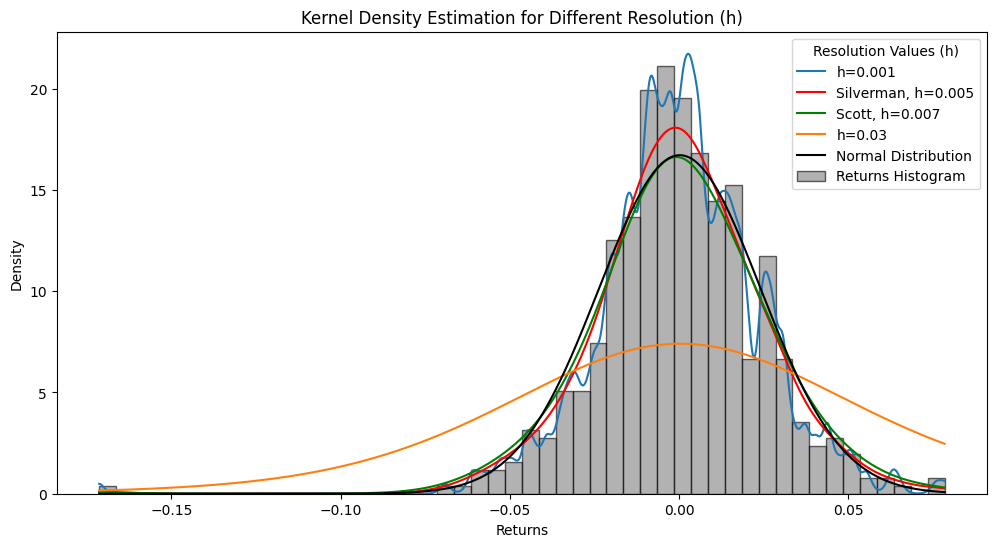

In [70]:
# Import norm from scipy.stats
from scipy.stats import norm

# Number of points to plot
number_of_points = 1000

# Plot the distribution for different values of h
plt.figure(figsize=(12, 6))

for h in [0.001, h_silverman, h_scott, 0.03]:
    x, y = kernel_density_distribution(returns, h, number_of_points)
    if h == h_silverman:
        plt.plot(x, y, label=f'Silverman, h={h}', color='red')
    elif h == h_scott:
        plt.plot(x, y, label=f'Scott, h={h}', color='green')
    else:
        plt.plot(x, y, label=f'h={h}')
    
# Display the normal distribution for comparison
x = np.linspace(min(returns), max(returns), number_of_points)
y = norm.pdf(x, np.mean(returns), np.std(returns))
plt.plot(x, y, label='Normal Distribution', color='black')


plt.hist(returns, bins=50, density=True, alpha=0.6, color='gray', edgecolor='black', label='Returns Histogram')
plt.legend(title='Resolution Values (h)')
plt.title('Kernel Density Estimation for Different Resolution (h)')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.show()

We need a function that accurately represents our returns without being too erratic. With $h = 0.001$, the function becomes overly volatile and overfits the return distribution.

Since our return distribution is unimodal, both Silverman’s and Scott’s Rules of Thumb fit the data well. Moreover, the kernel using Scott’s estimator closely approximates a normal distribution.

By comparing with the normal distribution, it is evident that kernel density estimation offers a more precise fit for our problem.

After examining the plot, we conclude that $h = 0.005$ using Silverman’s estimator provides the best balance for our project—avoiding both overfitting and excessive smoothing.

Computation of the cumulative kernel density function using density distribution

In [71]:
def cumulative_kernel_density(X, h, number_of_points):
    x, y = kernel_density_distribution(X, h, number_of_points)
    # Cumulative sum of the density and we normalize it
    return x, np.cumsum(y)/np.sum(y)

Plot the cumulative density function : 

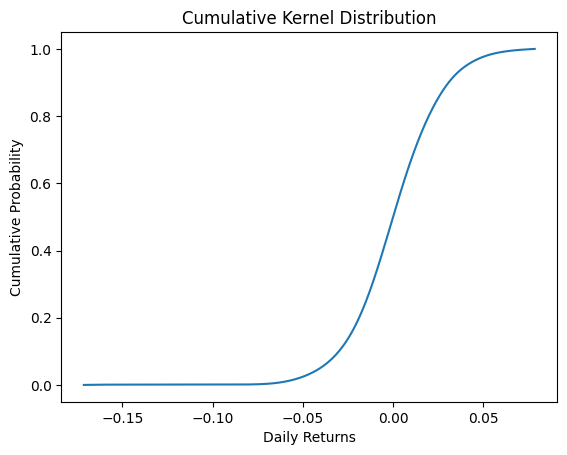

In [72]:
# Plot the cumulative distribution
x,y = cumulative_kernel_density(returns, h_silverman, number_of_points)

# Normalize the cumulative distribution
plt.plot(x, y)
plt.title('Cumulative Kernel Distribution')
plt.xlabel('Daily Returns')
plt.ylabel('Cumulative Probability')
plt.show()

Then, we can compute the value at risk with a risk level of $\alpha$ using the following formula (where $X$ represents the gain and $\alpha$ is the probability of experiencing a return worse than the VaR):
$$
\text{VaR}_{\alpha} = \text{F}^{-1}_{\alpha} \left( X \right)
$$

This means that we have $\alpha$% probability that the daily return is below or equal than the value at risk.


In [73]:
def kernel_VaR(X, h, alpha, number_of_points):
    # We calculate the cumulative distribution
    x, y = cumulative_kernel_density(X, h, number_of_points)

    # We find the index of the quantile
    y_VaR = np.argmax(y >= alpha)
    
    # Retourne la valeur de x correspondant au quantile VaR
    return x[y_VaR]

In [74]:
VaR_kernel = kernel_VaR(returns, h_silverman, 0.05, number_of_points)
VaR_kernel

-0.04032180065726021

Here, we have calculated the VaR for a 5% risk level. This means there is a 5% probability that the daily return on Natixis stock will be less than or equal to -0.0403 (-4.03%).

### A.b. Verification of the Kernel VaR

Which proportion of price returns between January 2017 and December 2018 exceed the VaR threshold defined in the previous question? Do you validate the choice of this non-parametric VaR?

To assess the accuracy of our previously calculated non-parametric Value at Risk (VaR), we perform a backtesting exercise using data from the period January 2017 to December 2018. The goal of this analysis is to determine the proportion of price returns that exceed the VaR threshold.

Extraction of price returns between January 2017 and December 2018

In [75]:
df_validation = df[(df['date'] >= '2017-01-01') & (df['date'] <= '2018-12-31')]
df_validation

,date,price,returns
513,2017-01-02,5.400,0.007463
514,2017-01-03,5.620,0.040741
515,2017-01-04,5.641,0.003737
516,2017-01-05,5.595,-0.008155
517,2017-01-06,5.563,-0.005719
...,...,...,...
1018,2018-12-21,4.045,-0.001481
1019,2018-12-24,4.010,-0.008653
1020,2018-12-27,3.938,-0.017955
1021,2018-12-28,4.088,0.038090


Proportion of price returns between January 2017 and December 2018 exceeding the VaR threshold defined in the previous question :

In [76]:
exceed = len(df_validation[df_validation['returns'] <= VaR_kernel])
print("The proportion of price returns below the VaR is: ", exceed/len(df_validation)*100, "%")

The proportion of price returns below the VaR is:  1.5686274509803921 %


If the VaR is accurate, we would expect the proportion of price returns exceeding the VaR to be lower than $\alpha$ (5% in this case) for the period between 2017 and 2018. 

In our case, 1.57% of the returns fall below the VaR threshold, suggesting that the computed VaR is both effective and conservative.

However, this result can be questioned since the proportion deviates significantly from the expected 5%. 
This discrepancy likely stems from the fact that the price return distribution for 2015–2016 differs substantially from that of 2017–2018 (as shown in the next plot). 

While the VaR is validated, it can be considered overly conservative.

Histogram of price returns during 2015-2016 and 2017-2018

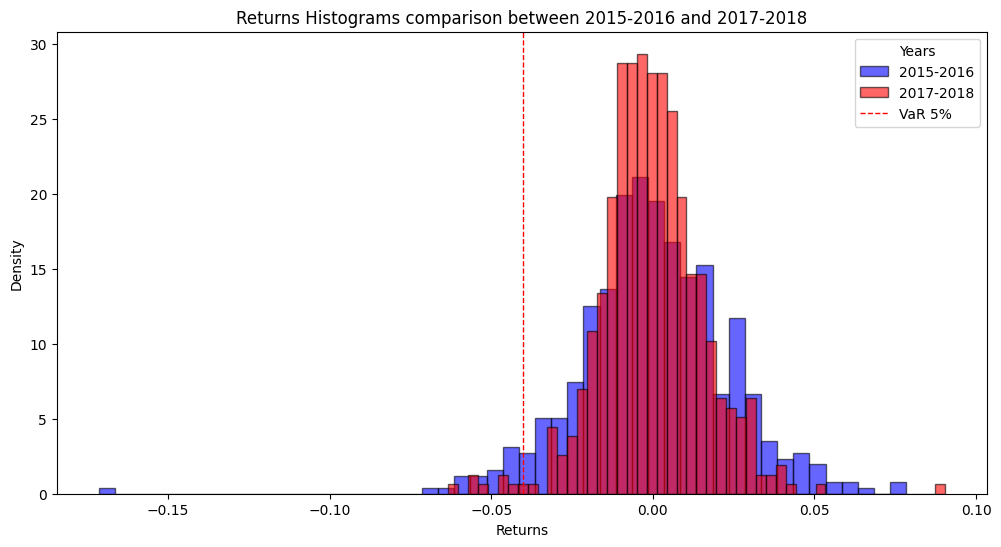

In [77]:
# Histogram of the returns between 2015 and 2016 in a color and the returns between 2017 and 2018 in another color

df_15_16 = df[(df['date'] >= '2015-01-01') & (df['date'] <= '2016-12-31')]
df_17_18 = df[(df['date'] >= '2017-01-01') & (df['date'] <= '2018-12-31')]


plt.figure(figsize=(12, 6))
plt.hist(df_15_16['returns'], bins=50, density=True, alpha=0.6, color='blue', edgecolor='black', label='2015-2016')
plt.hist(df_17_18['returns'], bins=50, density=True, alpha=0.6, color='red', edgecolor='black', label='2017-2018')

#Display the VaR Computed
plt.axvline(VaR_kernel, color='red', linestyle='dashed', linewidth=1, label='VaR 5%')
plt.legend(title='Years')
plt.title('Returns Histograms comparison between 2015-2016 and 2017-2018')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.show()

The return distribution between the 2015-2016 and 2017-2018 periods is clearly different. This explains why our 5% Value at Risk for 2015-2016 is exceeded in only 1.57% of the returns during the 2017-2018 period. 

#### Conclusion Q.A

This underscores the well-known adage "past performance is not indicative of future results," which serves as a reminder that market conditions and risk factors can change over time. The differences in return distributions between the 2015-2016 and 2017-2018 periods demonstrate that relying solely on historical data may not always provide an accurate picture of future risk. 

In light of this, it is crucial to use a range of approaches when calculating Value at Risk (VaR), rather than relying exclusively on historical methods. While historical simulations can offer valuable insights, they are based on the assumption that future returns will follow similar patterns to those observed in the past. However, financial markets can experience structural shifts, changes in volatility, or unexpected events that can cause the return distribution to deviate from past trends.

To enhance the accuracy and robustness of VaR estimates, it is important to incorporate other methods, such as Monte Carlo simulations, parametric approaches, which can better account for the uncertainty and dynamics of future market conditions. By combining multiple techniques, we can create a more comprehensive risk assessment that reflects the potential for various scenarios and better captures the true level of risk.

## Question B : Estimating VaR for a call option via the Monte Carlo method

In [78]:
import pandas as pd
import numpy as np
from math import sqrt, log
from scipy.stats import norm

We start by importing our data for the Natixis stock between 2015 and 2018 (already done in the previous question)

We then calculate the returns for the period (already done in the previous question)

We implement a squared returns column in order to prepare for our future calculations

In [79]:
df['Rendements_carré'] = df['returns']**2
print(df.head())

        date  price   returns  Rendements_carré
1 2015-01-05  5.424 -0.035047          0.001228
2 2015-01-06  5.329 -0.017515          0.000307
3 2015-01-07  5.224 -0.019704          0.000388
4 2015-01-08  5.453  0.043836          0.001922
5 2015-01-09  5.340 -0.020723          0.000429


### I. Parameters Estimation

The following formula characterizes a brownian geometric motion : 

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

$S_t$ is the value of the asset at time $t$,  
$\mu$ is the expected growth rate,  
$\sigma$ is the volatility,  
$W_t$ is a standard Brownian motion.

The objective will first be to estimate the parameters $\mu$ and $\sigma$ in our context. 

#### 1. estimation of μ 

This estimation can easily be made by computing the mean of every return on our period. This is what we do in the following computation:

In [80]:
mean = df['returns'].mean()  
mean

-9.696604801149598e-05

The estimation for μ is therefore given by -9.696604801149598e-05

#### 2. estimation of $\sigma$ 

An estimaton of the volatility is given by the following formula :

$$
\sigma_t^2 = (1 - \lambda) ( r_{t-1}^2 + \lambda \cdot r_{t-2}^2 + \lambda^2 \cdot r_{t-3}^2 + \dots)
$$

The idea through this process is to give lower weights to the oldest returns in order to focus more on the most recent. As seen in class, we decided to choose the smoothing factor lambda as 0,94. The implementation of the formula is made in the calcul_variance function:


In [81]:
def calcul_variance(df):
    lambda_value = 0.94
    variance = 0
    for i in range(0, len(df) - 1): 
        lambda_power = lambda_value ** (len(df) - i - 2)
        rendement_carres = df['Rendements_carré'].iloc[i]
        variance = variance + (1 - lambda_value) * rendement_carres * lambda_power
    volatilite = variance ** 0.5
    return volatilite

In [82]:
volatilite = calcul_variance(df)
print("Estimated volatility (1 day) :", volatilite)

Estimated volatility (1 day) : 0.024930456634599526


We then annualize the volatility considering 252 days of trading for one day

In [83]:
annual_vol = 0.02424224156705614*sqrt(252)
print("Annualized volatility :", annual_vol)

Annualized volatility : 0.3848336544550998


We therefore obtain the following results for our dataset :
- Estimated volatility (1 day) : 0.02424224156705614
- Annualized volatility : 0.3848336544550998



### II. Prices simulation

The formula to simulate a price is the following :

$$ S_t = S_0 \exp \left(( \mu - \frac{1}{2} \sigma^2)t + \sigma W_t \right) $$


$S_t$ is the value of the asset at time $t$,  
$S_0$ is the initial price of the asset at the end of 2018,  
$\mu$ is the expected growth rate,  
$\sigma$ is the volatility,  
$W_t$ is a standard Brownian motion (following a standard normal distribution)

The calculation for 1000 simulations and t=1 is made in the following cell and the results are stored in the simulated_prices tab.

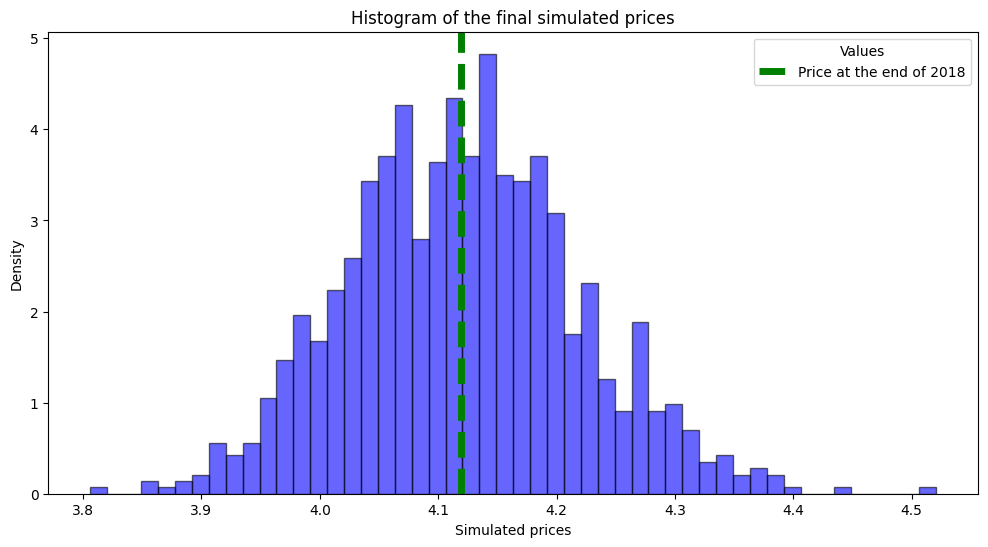

In [84]:
S0 = 4.119  # Initial stock price at the end of 2018
mu = -9.696604801149598e-05  # As seen in the previous question
sigma = 0.02424224156705614  # As seen in the previous question
N = 1000  # Number of simulations
np.random.seed(42)  # For reproducibility
# Note that we are aiming for a one-day horizon, so t=1 (no need to specify it here, that's why our formula is smaller)

simulated_prices = np.zeros(N)  # We Create an array to hold the number of simulations for the prices

for i in range(0, N):
    Wt = np.random.normal(0, 1)  # Standard normal variable for W_t (as seen in class)
    simulated_prices[i] = S0 * np.exp((mu - 0.5 * sigma**2) + sigma * Wt)  # Formula for S_t

# Plot the histogram of the simulated prices
plt.figure(figsize=(12, 6))
plt.hist(simulated_prices, bins=50, edgecolor='black', density=True, color='blue', alpha=0.6)

#Add S0 to the plot
plt.axvline(S0, color='green', linestyle='dashed', linewidth=5, label='Price at the end of 2018')
plt.legend(title='Values')
plt.title('Histogram of the final simulated prices')
plt.xlabel('Simulated prices')
plt.ylabel('Density')
plt.show()

1000 simulations were necessary in order to get more stable and reliable results. With such a number of simulations, it is easier to reduce the variability due to randomness and obtain a better estimate of the future price distributions. It is also interesting to perform such numerous simulations as the mean, variance, and quantiles of the simulated prices converge to their theoretical values as the number of simulations increases.

### III. Transformation in Prices of the corresponding call 

We are now going to use the Black and Scholes formula in order to price the call options for our dataset. Its is defined as follows :


$$
C = S_0 \cdot N(d_1) - K \cdot e^{-rT} \cdot N(d_2)
$$

Where:

- $C$ is the price of the call option,
- $S_0$ is the current stock price,
- $K$ is the strike price,
- $r$ is the risk-free interest rate,
- $T$ is the time to maturity,
- $N(d)$ is the cumulative distribution function (CDF) of the standard normal distribution,
- $d_1$ and $d_2$ are given by:

$$
d_1 = \frac{\ln(S_0 / K) + (r + \frac{\sigma^2}{2}) \cdot T}{\sigma \cdot \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma \cdot \sqrt{T}
$$

Where:

- $\sigma$ is the volatility of the asset.


As given in the statement and as discussed in class, the strike price K is set to 4 while the risk free rate is set to 0 and the time to maturity is 21 (1 month is 21 days of trading). 

We implemented the Black and Scholes formula as follows :

In [85]:
def BS_call (S_0, K,T, sigma):
    d1 = (log(S_0/K)+0.5*sigma**2*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    C = S_0 * norm.cdf(d1) - K * norm.cdf(d2) #with exp(-rT) = 1 because r=0 in the instructions
    return C

In [86]:
T = 21 # Time to maturity
sigma = 0.02424224156705614  # Volatility
K = 4 # Strike price

# call' prices calculation
call_prices = []
for i in range(len(simulated_prices)):
    S0 = simulated_prices[i] #S0 corresponds to the current simulated price
    call_price = BS_call(S0, K, T, sigma)
    call_prices.append(call_price) #add to the call_prices list

for i in range(len(simulated_prices)):
    print(f"Prix sous-jacent: {simulated_prices[i]:.8f}, Prix de l'option call: {call_prices[i]:.8f}")

Prix sous-jacent: 4.16726969, Prix de l'option call: 0.27667275
Prix sous-jacent: 4.10361285, Prix de l'option call: 0.23601665
Prix sous-jacent: 4.18254966, Prix de l'option call: 0.28691509
Prix sous-jacent: 4.27225275, Prix de l'option call: 0.35056977
Prix sous-jacent: 4.09408481, Prix de l'option call: 0.23021931
Prix sous-jacent: 4.09408644, Prix de l'option call: 0.23022029
Prix sous-jacent: 4.27807553, Prix de l'option call: 0.35489942
Prix sous-jacent: 4.19470890, Prix de l'option call: 0.29519473
Prix sous-jacent: 4.07079574, Prix de l'option call: 0.21637388
Prix sous-jacent: 4.17190380, Prix de l'option call: 0.27975977
Prix sous-jacent: 4.07139349, Prix de l'option call: 0.21672344
Prix sous-jacent: 4.07116530, Prix de l'option call: 0.21658996
Prix sous-jacent: 4.14161295, Prix de l'option call: 0.25988993
Prix sous-jacent: 3.93077813, Prix de l'option call: 0.14320378
Prix sous-jacent: 3.94876839, Prix de l'option call: 0.15161806
Prix sous-jacent: 4.06164676, Prix de l'

### IV. Empirical quantile of these N call prices to build the VaR of the call.

Initial call price :

In [87]:
C0 = BS_call(4.119, K=4, T=21, sigma=sigma)
C0

0.24553972331325147

Calculation of the returns based on the initial call price (basic returns calculation function)

In [88]:
returns = [(call_price - C0)/C0 for call_price in call_prices]

We then sort the returns by ascending order to prepare for the use of the index in the VaR calculation

In [89]:
sorted_returns = sorted(returns)

Calculation of the VaR

VaR at 99% : 0.6868491834
VaR at 1% : -0.4535036517


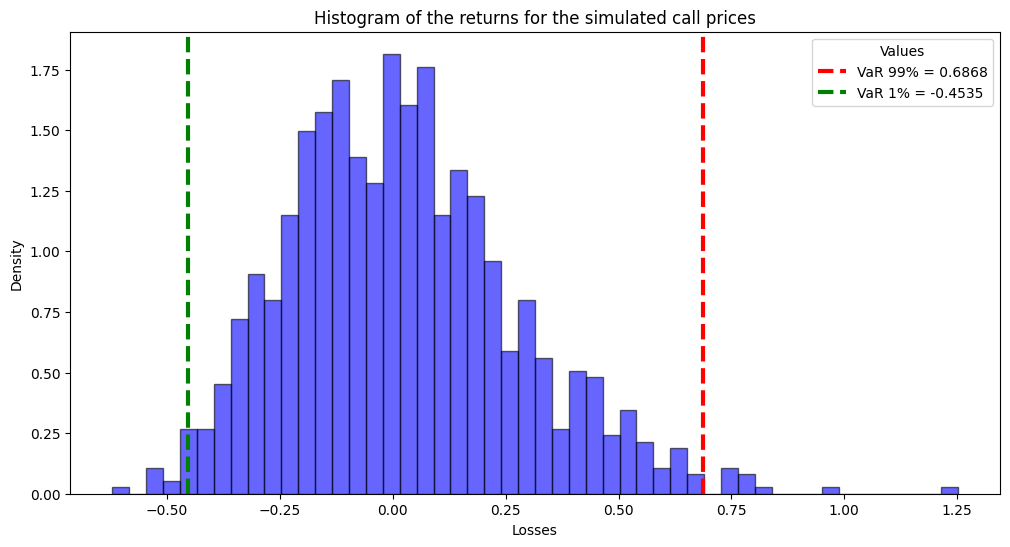

In [90]:
def calculate_VaR(sorted_returns, p):  
    index = len(sorted_returns) - int(len(sorted_returns) * p)  # Index corresponding to confidence level
    VaR = sorted_returns[index - 1]  # We Adjust for Python's 0-based indexing
    return VaR

# Calculate VaR at 99% and 1% confidence levels
VaR_99_percent = calculate_VaR(sorted_returns, p=0.01)  # 99% confidence level
VaR_1_percent = calculate_VaR(sorted_returns, p=0.99)   # 1% confidence level

print(f"VaR at 99% : {VaR_99_percent:.10f}")
print(f"VaR at 1% : {VaR_1_percent:.10f}")

plt.figure(figsize=(12, 6))
plt.hist(sorted_returns, bins=50, edgecolor='black', density=True, color='blue', alpha=0.6)

plt.axvline(VaR_99_percent, color='red', linestyle='dashed', linewidth=3, label=f'VaR 99% = {VaR_99_percent:.4f}')
plt.axvline(VaR_1_percent, color='green', linestyle='dashed', linewidth=3, label=f'VaR 1% = {VaR_1_percent:.4f}')
plt.legend(title='Values')
plt.title('Histogram of the returns for the simulated call prices')
plt.xlabel('Losses')
plt.ylabel('Density')
plt.show()

Our results are the followings :  
VaR at 99% : 0.6868491834  
VaR at 1% : -0.4535036517

## Question C : Analyze of price returns using Extreme Value Theory

### Question C.a : Estimation of the GEV Parameters for the two tails of the distribution returns

Definition of Pickands Estimator :

Let $ (X_n) $ be a sequence of i.i.d. random variables, whose cdf $ F $ belongs to the max-domain of attraction of a GEV distribution of parameter $ \xi \in \mathbb{R} $. 

Let $ k $ be a function $ \mathbb{N} \to \mathbb{N} $. 

If $\lim_{n \to \infty} k(n) = \infty \quad \text{and} \quad  \lim_{n \to \infty} \frac{k(n)}{n} = 0,$
then the Pickands estimator, defined by:


$\xi_P^{k(n),n} = \frac{1}{\log(2)} \log \left(\frac{X_{n-k(n)+1:n} - X_{n-2k(n)+1:n}}{X_{n-2k(n)+1:n} - X_{n-4k(n)+1:n}}
\right),
$
converges in probability to $ \xi $.

With $X_{i:n}$, the $i^{th}$ value of the price returns when arranged in ascending order.

First step: Spliting returns between positive and negative to analyze both tails

In [91]:
# Split the returns into positive and negative returns and replace the other values by -1
neg_returns = np.where(df['returns']<0, np.abs(df['returns']), -1)
pos_returns = np.where(df['returns']>=0, df['returns'], -1)

Next, we convert the arrays into pandas Series and filter out positive values from the negative returns array (and vice versa for the positive returns array). Each Series is then sorted in ascending order to ensure proper application of the Pickands estimator.

In [92]:
# Transform the arrays into pandas Series
pos_returns = pd.Series(pos_returns)

# Remove the -1 values (negative returns)
pos_returns = pos_returns[pos_returns != -1]

# Sort the values
pos_returns.sort_values(inplace=True)
pos_returns 

396    0.000000
967    0.000000
239    0.000000
353    0.000000
968    0.000000
         ...   
304    0.063389
163    0.064755
402    0.075912
325    0.078431
590    0.090281
Length: 503, dtype: float64

Same task for negative returns

In [93]:
# Transform the arrays into pandas Series
neg_returns = pd.Series(neg_returns)

# Remove the -1 values (negative returns)
neg_returns = neg_returns[neg_returns != -1]

# Sort the values
neg_returns.sort_values(inplace=True)
neg_returns 

95      0.000138
509     0.000186
317     0.000231
777     0.000281
757     0.000304
          ...   
404     0.060664
357     0.061448
1015    0.063328
344     0.069083
377     0.171325
Length: 519, dtype: float64

To compute Pickands estimator, we first need to find the function k present in the previous definition

For our project, we will use the following function:

$f(x) = \lfloor ln(x) \rfloor $

Indeed, it follows all the condition needed :

$\lim_{n \to \infty} \lfloor ln(n) \rfloor = \infty \quad \text{and} \quad  \lim_{n \to \infty} \frac{\lfloor ln(n) \rfloor}{n} = 0$ and $f$ is a function $\mathbb{N} \to \mathbb{N} $. 


In [94]:
import math 

def k(n):
    return math.floor(np.log(n))

Now, we can apply the formula defined previously and compute the pickands estimator for both tails

In [95]:
# Pre-computed indexes used for the Pickands Estimator
index_1 = len(pos_returns)-k(len(pos_returns))
index_2 = len(pos_returns)-2*k(len(pos_returns))
index_3 = len(pos_returns)-4*k(len(pos_returns))

# Pickands Estimator for the positive returns                        
pickands_estimator_pos = 1/np.log(2) * np.log((pos_returns.iloc[index_1] - pos_returns.iloc[index_2])/(pos_returns.iloc[index_2] - pos_returns.iloc[index_3]))
pickands_estimator_pos

0.5772338569463368

For the positive returns, we calculated a Pickands estimator of $ \xi = 0.577$. Since $ \xi > 0 $, the cumulative distribution function (CDF) of the extreme gains belongs to the max-domain of attraction of the Fréchet distribution, which encompasses thick-tailed distributions.

In [96]:
# Pre-computed indexes used for the Pickands Estimator
index_1 = len(neg_returns)-k(len(neg_returns))
index_2 = len(neg_returns)-2*k(len(neg_returns))
index_3 = len(neg_returns)-4*k(len(neg_returns))

# Pickands Estimator for the negative returns                      
pickands_estimator_neg = 1/np.log(2) * np.log((neg_returns.iloc[index_1] - neg_returns.iloc[index_2])/(neg_returns.iloc[index_2] - neg_returns.iloc[index_3]))
pickands_estimator_neg

-0.5089715779341932

For the negative returns, we calculated a Pickands estimator of $ \xi = -0.509$. Since $ \xi < 0 $, the cumulative distribution function (CDF) of the extreme losses belongs to the max-domain of attraction of the Weibull distribution, which distributions with finite support.

### Question C.b: Determine the extremal index using the block or run de-clustering

For our project, we decided to determine the extremal index using the run de-clustering 

**Run Declustering**

Run declustering is a method used to estimate the **extremal index** $\theta$, which measures the dependence structure of extreme values in a time series. Specifically, $\theta$ quantifies the rate at which extreme events (such as large values or outliers) occur independently within the series. If the series is independent, $\theta = 1$, meaning that each extreme event is isolated, and there is no dependence between them. As the dependence between extreme values increases, $\theta$ decreases.

In **run declustering**, the time series is divided into "runs" based on a sliding window of arbitrary size $r$. The window slides across the series, and for each window, the maximum value of the data within that window is computed. The aim is to identify clusters of extreme values that are close to each other in time, using a threshold $u$.

The **run declustering estimator** for $\theta$, denoted by $\hat{\theta}_R^n(u;r)$, is computed as follows:

$
\hat{\theta}_R^n(u;r) = \frac{\sum_{i=1}^{n-r} 1(X_i > u, M_{i,i+r} \leq u)}{\sum_{i=1}^{n-r} 1(X_i > u)}
$

Where:
- $X_i$ is the observed value at time $i$,
- $M_{i,i+r} = \max(X_i, X_{i+1}, \dots, X_{i+r})$ is the maximum value in the sliding window of size $r$
- $u$ is the threshold for the extreme value
- $R$ is the window size

This method contrasts with **block declustering**, which uses fixed-sized blocks of data. Instead, run declustering uses a sliding window to account for the dependence between consecutive extremes, allowing for a more dynamic estimation of the extremal index.



Because we are studying both tails, we are going to compute two extremal index : one for extreme gains and one for extreme loss

First step: Compute the returns without sorting them.

In [97]:
returns = df['returns']
returns

1      -0.035047
2      -0.017515
3      -0.019704
4       0.043836
5      -0.020723
          ...   
1018   -0.001481
1019   -0.008653
1020   -0.017955
1021    0.038090
1022    0.007583
Name: returns, Length: 1022, dtype: float64

We can define the extremal_index function for gains and loss using the previous formula

In [98]:
def extremal_index_gain(u, r):
    s = 0
    s2 = 0
    for i in range(len(returns)-r):
        if(returns.iloc[i] > u and returns[i+1:i+r].max()<=u):
            s += 1
        if(returns.iloc[i] > u):
            s2 += 1
    return s/s2

In our analysis, we need to define the parameter \( r \), which represents the window size. To ensure meaningful results, we will set the window size to one trading month, or 21 days.

In [99]:
print("Extremal index for extreme gains:", extremal_index_gain(0.05, 21))

Extremal index for extreme gains: 0.5833333333333334


Extremal index for losses

In [100]:
def extremal_index_loss(u, r):
    s = 0
    s2 = 0
    for i in range(len(returns)-r):
        if(returns.iloc[i] < u and returns[i+1:i+r].min()>=u):
            s += 1
        if(returns.iloc[i]<u):
            s2 += 1
    return s/s2

In [101]:
print("Extremal index for extreme losses:", extremal_index_loss(-0.05, 21))

Extremal index for extreme losses: 0.46153846153846156


## Question D : Almgren and Chriss Model

### Question D.a: Estimation of all the parameters of the model of Almgren and Chriss. Is this model well specified? 


#### Importation of the Data from TD4

In [74]:
# Import TD4 data
data = pd.read_excel('Dataset TD4.xlsx')
data

,transaction date (1=1day=24 hours),bid-ask spread,volume of the transaction (if known),Sign of the transaction,Price (before transaction)
0,0.000202,0.1100,8.0,-1,100.000
1,0.001070,0.1030,NaN,1,99.984
2,0.001496,0.1015,NaN,-1,100.029
3,0.003336,0.0920,NaN,1,99.979
4,0.003952,0.1106,NaN,1,100.060
...,...,...,...,...,...
996,0.981441,0.0834,79.0,1,101.070
997,0.981875,0.1010,NaN,-1,101.120
998,0.986784,0.1007,NaN,-1,100.998
999,0.991232,0.1153,3.0,-1,100.958


In [75]:
data['returns'] = data['Price (before transaction)'].shift(-1)/data['Price (before transaction)'] - 1
data

,transaction date (1=1day=24 hours),bid-ask spread,volume of the transaction (if known),Sign of the transaction,Price (before transaction),returns
0,0.000202,0.1100,8.0,-1,100.000,-0.000160
1,0.001070,0.1030,NaN,1,99.984,0.000450
2,0.001496,0.1015,NaN,-1,100.029,-0.000500
3,0.003336,0.0920,NaN,1,99.979,0.000810
4,0.003952,0.1106,NaN,1,100.060,0.000999
...,...,...,...,...,...,...
996,0.981441,0.0834,79.0,1,101.070,0.000495
997,0.981875,0.1010,NaN,-1,101.120,-0.001206
998,0.986784,0.1007,NaN,-1,100.998,-0.000396
999,0.991232,0.1153,3.0,-1,100.958,-0.000099


Calcul the cost of each trade

In [76]:
data['costs'] = data['Price (before transaction)'].shift(-1) - data['Price (before transaction)']
data

,transaction date (1=1day=24 hours),bid-ask spread,volume of the transaction (if known),Sign of the transaction,Price (before transaction),returns,costs
0,0.000202,0.1100,8.0,-1,100.000,-0.000160,-0.016
1,0.001070,0.1030,NaN,1,99.984,0.000450,0.045
2,0.001496,0.1015,NaN,-1,100.029,-0.000500,-0.050
3,0.003336,0.0920,NaN,1,99.979,0.000810,0.081
4,0.003952,0.1106,NaN,1,100.060,0.000999,0.100
...,...,...,...,...,...,...,...
996,0.981441,0.0834,79.0,1,101.070,0.000495,0.050
997,0.981875,0.1010,NaN,-1,101.120,-0.001206,-0.122
998,0.986784,0.1007,NaN,-1,100.998,-0.000396,-0.040
999,0.991232,0.1153,3.0,-1,100.958,-0.000099,-0.010


Next, we transform the volume to the signed volume (volume*sign of the transaction)

In [77]:
data['volume of the transaction (if known)']=data['volume of the transaction (if known)']*data['Sign of the transaction']
data

,transaction date (1=1day=24 hours),bid-ask spread,volume of the transaction (if known),Sign of the transaction,Price (before transaction),returns,costs
0,0.000202,0.1100,-8.0,-1,100.000,-0.000160,-0.016
1,0.001070,0.1030,NaN,1,99.984,0.000450,0.045
2,0.001496,0.1015,NaN,-1,100.029,-0.000500,-0.050
3,0.003336,0.0920,NaN,1,99.979,0.000810,0.081
4,0.003952,0.1106,NaN,1,100.060,0.000999,0.100
...,...,...,...,...,...,...,...
996,0.981441,0.0834,79.0,1,101.070,0.000495,0.050
997,0.981875,0.1010,NaN,-1,101.120,-0.001206,-0.122
998,0.986784,0.1007,NaN,-1,100.998,-0.000396,-0.040
999,0.991232,0.1153,-3.0,-1,100.958,-0.000099,-0.010


#### Computation of Almgren and Chriss parameters :

- volatility $\sigma$
- Quadradic Impact parameter, $\eta$
- Linear Impact parameter, $\gamma$
- Risk Aversion, $\lambda$

##### Volatility

In [78]:
volatility = data['returns'].std()*np.sqrt(252*8) # 252 trading days per year and 8 number of trading hours per day
volatility

0.033155056966150315

We have to drop raw without a known volume

In [79]:
data.dropna(inplace=True)
data

,transaction date (1=1day=24 hours),bid-ask spread,volume of the transaction (if known),Sign of the transaction,Price (before transaction),returns,costs
0,0.000202,0.1100,-8.0,-1,100.000,-0.000160,-0.016
6,0.004074,0.1294,32.0,1,100.164,0.000260,0.026
16,0.014393,0.1141,-8.0,-1,100.048,-0.000190,-0.019
28,0.022861,0.0978,-141.0,-1,99.876,-0.000751,-0.075
51,0.037864,0.1291,-121.0,-1,99.608,-0.000863,-0.086
...,...,...,...,...,...,...,...
988,0.968804,0.0896,-14.0,-1,101.206,-0.000217,-0.022
989,0.969113,0.1105,-150.0,-1,101.184,-0.000998,-0.101
990,0.971882,0.0929,-17.0,-1,101.083,-0.000247,-0.025
996,0.981441,0.0834,79.0,1,101.070,0.000495,0.050


#### Permanent Impact : $\gamma$

The permanent impact function is defined by :

$
g(v) = \gamma v
$

- $\gamma$ is the temporary impact parameter,
- $v$ is the signed volume

To estimate $\gamma$, we have to use a linear regression 

In [80]:
def linear_regression(X, y):
    X_mean = np.mean(X, axis=1)
    y_mean = np.mean(y)


    XtX = np.dot(X.T, X)
    Xty = np.dot(X.T, y)
    beta = np.dot(np.linalg.inv(XtX),Xty)

    return beta

Plot the linear regression of the function:

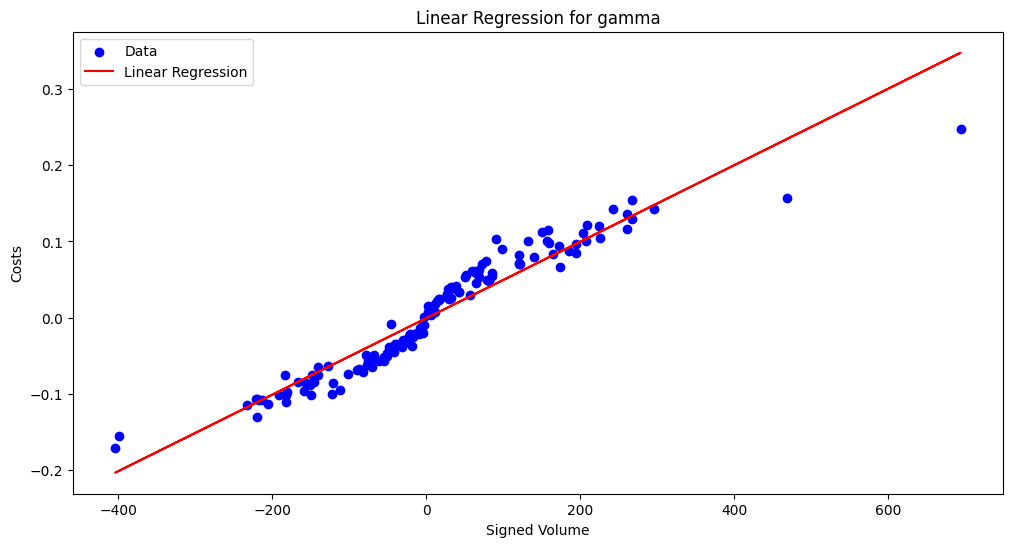

In [113]:
tau = 1/24

v = data['volume of the transaction (if known)'].values  
cost = data['costs'].values  

X_eta = np.column_stack((np.ones(len(v)), v))

gamma = linear_regression(X_eta, cost)

prediction = np.dot(X_eta, gamma)

# Plot the linear regression
plt.figure(figsize=(12, 6))
plt.scatter(v, cost, color='blue', label='Data')
plt.plot(v, prediction, color='red', label='Linear Regression')
plt.title('Linear Regression for gamma')
plt.xlabel('Signed Volume')
plt.ylabel('Costs')
plt.legend()
plt.show()


Validation of the parameters $\gamma$

We calculate the p-value of the coefficient to assess its statistical significance.

We are going to use a t-test to prove this

In [82]:
from scipy import stats

def stat(X, y, beta):
    n = len(X)
    residuals = y - beta*X
    sigma = np.sqrt(np.sum(residuals**2)/(n-2))
    
    t = beta/(sigma/np.sqrt(np.sum((X - np.mean(X))**2)))

    mse = np.sum(residuals**2)/n

    R2 = 1 - np.sum(residuals**2)/np.sum((y - np.mean(y))**2)

    return t, mse, R2

In [83]:
t_test = stat(data['volume of the transaction (if known)'], data['costs'], gamma[1])
print(f't-value: {t_test[0]}')
print(f'MSE: {t_test[1]}')
print(f'R2: {t_test[2]}')

print("Beta: ", gamma)
print("Gamma: ", gamma[1])

t-value: 39.19629475443425
MSE: 0.0004913083540866445
R2: 0.9192195407719944
Beta:  [-0.00074688  0.00050238]
Gamma:  0.00050237805904092


The t-value of 39 provides strong evidence that $ \gamma$ is significant ($ H_0: \beta = 0 $), indicating that $ \gamma $ effectively explains the cost of the transaction.

Furthermore, we computed the MSE and $ R^2 $. An MSE of 0.00049 and an $R^2 $ score of 0.91 reinforce that $ \gamma $ is a significant parameter.

In conclusion, $ \gamma $ is statistically significant for our model, and the parameter is well-defined.

#### Temporary Impact, $\eta$


Let h, the quadratic impact model defined by :

$ h\left(\frac{n_k}{\tau}\right) = \xi \, \text{sgn}(n_k) + \eta \, \frac{n_k}{\tau}$

Our goal is to estimate $\eta$ with our data.

The cost is defined by :

$ S_k = S_{k-1} - h(n_k/\tau) $

So by replacing, we have: 

$ S_{k-1} - S_k= h(n_k/\tau) $

Multiplying by the volume, we can get the formula of the cost of the trade times the volume : 

$ n_k \Delta P = \xi \, \left|n_k \right|+ \eta \, \frac{n_k^2}{\tau}$

Then we can easily estimate $\eta$ with a linear regression

In [215]:
bid_ask = (data['bid-ask spread']/2).mean()
costs = data['costs']

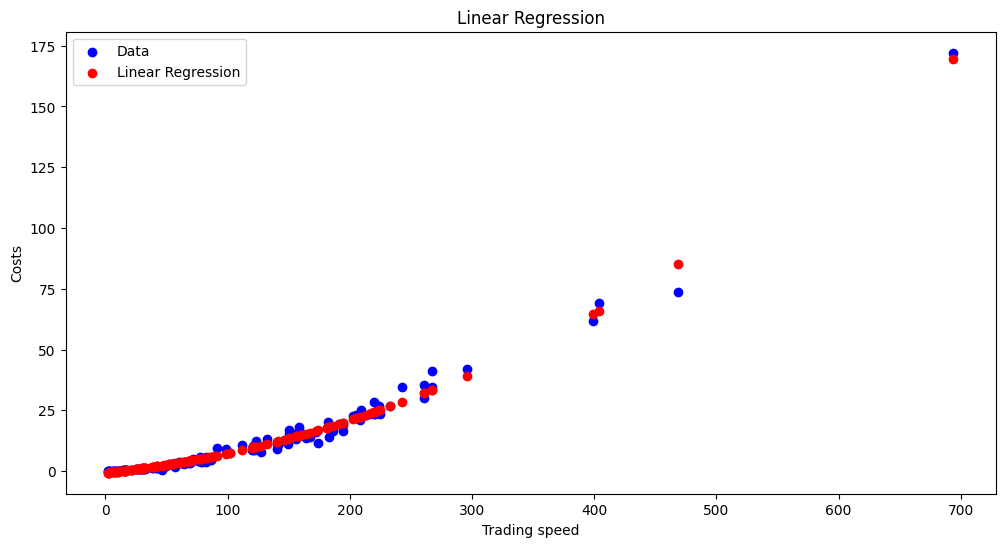

In [226]:
X_eta = np.column_stack((np.sign(v)*bid_ask*v, v*v/tau))
X_eta = np.hstack((np.ones((len(X_eta), 1)), X_eta))
y_eta = costs*v

coef_eta = linear_regression(X_eta, y_eta)
coef_eta

# Plot the linear regression
plt.figure(figsize=(12, 6))
plt.scatter(np.sign(v)*v, costs*v, color='blue', label='Data')
plt.scatter(np.sign(v)*v, np.dot(X_eta, coef_eta), color='red', label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Trading speed')
plt.ylabel('Costs')
plt.legend()
plt.show()

In [225]:
eta = coef_eta[2]
print(eta)

-1.1524414198945331e-05


In [218]:
t_test = stat(data['volume of the transaction (if known)'], data['costs'], eta)
print(f't-value: {t_test[0]}')
print(f'MSE: {t_test[1]}')
print(f'R2: {t_test[2]}')

print("Beta: ", coef_eta)
print("Eta: ", eta)

t-value: 0.2607814701978488
MSE: 0.005840729726134348
R2: 0.03967269113321659
Beta:  [-7.54771108e-01  1.06026410e+00  1.15244142e-05]
Eta:  1.1524414198945331e-05


We observe that, despite an MSE of 0.005, the R2 value is low and the t-value is also small, indicating that $\eta$ is not statistically significant. Therefore, our model is not well-defined.

### Computation of the optimal liquidation strategy

Even if the model is not well-specified, let's compute the optimal liquidation strategy

After estimating $\gamma$ and $\eta$, we can apply the formula of the efficient frontier for several levels of risk aversion corresponding to the Lagrangian $\lambda$ :

$$
x_k = \frac{\sinh\left(K\left(T - \left(k - \frac{1}{2}\tau\right)\right)\right)}{\sinh(KT)} \cdot X
$$
Where:
- $x_k$  : Quantity to sell at time k
- $T$  : Total execution time, 
- $\tau$  : Time step, 
- $X$  : Total quantity to sell.



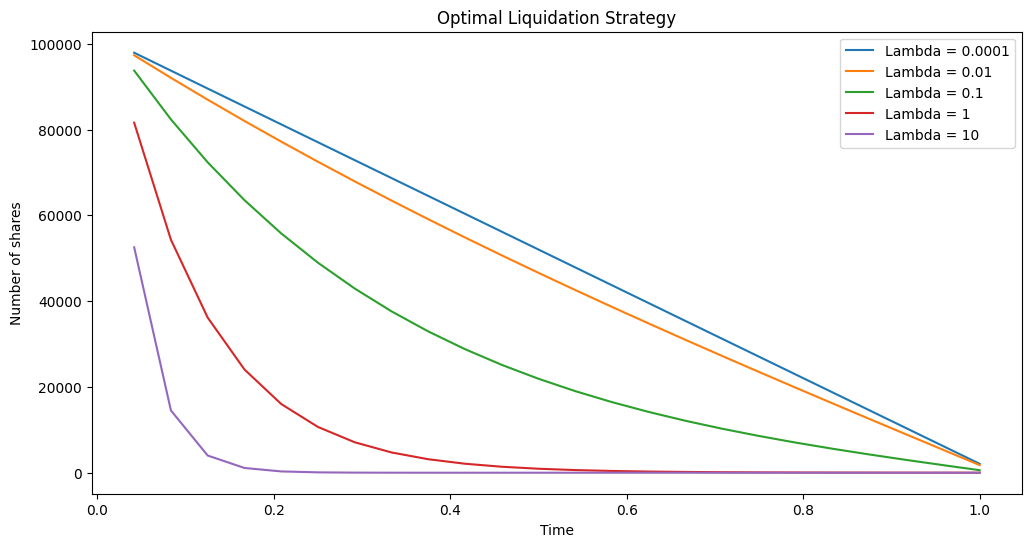

In [223]:
X = 100000

Time = [1/24 * i for i in range(1, 25)]
lambda_ = [1e-4, 1e-2,  1e-1,1, 10]


plt.figure(figsize=(12, 6))
for l in lambda_:
    K = np.sqrt(l*volatility*volatility/eta)
    x_k = [np.sinh(K*(1-Time+tau/2))*X/ np.sinh(K*1) for Time in Time]
    plt.plot(Time, x_k, label=f'Lambda = {l}')

plt.title('Optimal Liquidation Strategy')
plt.xlabel('Time')
plt.ylabel('Number of shares')
plt.legend()
plt.show()



We can see tha even if the model is not well-defined, we can see that our results are logic. The resulting liquidation strategies demonstrate how the choice of $ \lambda $ influences the liquidation speed. A higher value of $ \lambda $ leads to a more aggressive liquidation early in the process, as the trader is willing to take on greater liquidity risk to reduce market risk exposure. On the other hand, a lower $ \lambda $ results in a more gradual liquidation, prioritizing the minimization of liquidity risk, even at the cost of increased market risk

## Question E : Haar wavelets and Hurst exponent

We start by importing the data needed for this question (we decided to separate each FXrates on different sheets in order to facilitate the comprehension and the manipulation of the data).

In [3]:
gbp_eur=pd.read_excel("Dataset TD5.xlsx", sheet_name='GBPEUR')
sek_eur=pd.read_excel("Dataset TD5.xlsx", sheet_name='SEKEUR')
cad_eur=pd.read_excel("Dataset TD5.xlsx", sheet_name='CADEUR')
gbp_eur.head()

,Date,HIGH,LOW
0,2016-03-07 08:59:59.990,1.2932,1.2917
1,2016-03-07 09:15:00.000,1.2940,1.2930
2,2016-03-07 09:30:00.000,1.2943,1.2922
3,2016-03-07 09:45:00.000,1.2930,1.2913
4,2016-03-07 10:00:00.000,1.2931,1.2921


We create a column PRICE to get the mean of the high and low for each date.

In [4]:
gbp_eur["PRICE"]=(gbp_eur["HIGH"]+gbp_eur["LOW"])/2
sek_eur["PRICE"]=(sek_eur["HIGH"]+sek_eur["LOW"])/2
cad_eur["PRICE"]=(cad_eur["HIGH"]+cad_eur["LOW"])/2
gbp_eur.head()

,Date,HIGH,LOW,PRICE
0,2016-03-07 08:59:59.990,1.2932,1.2917,1.29245
1,2016-03-07 09:15:00.000,1.2940,1.2930,1.29350
2,2016-03-07 09:30:00.000,1.2943,1.2922,1.29325
3,2016-03-07 09:45:00.000,1.2930,1.2913,1.29215
4,2016-03-07 10:00:00.000,1.2931,1.2921,1.29260


### Question E.a : 

We will start by calcuating the returns for each FX rates :

In [25]:
def ret(price):
    return (price-price.shift())/price.shift()
gbp_eur["RET"]=ret(gbp_eur["PRICE"])
sek_eur["RET"]=ret(sek_eur["PRICE"])
cad_eur["RET"]=ret(cad_eur["PRICE"])
gbp_eur.head()

,Date,HIGH,LOW,PRICE,RET
0,2016-03-07 08:59:59.990,1.2932,1.2917,1.29245,NaN
1,2016-03-07 09:15:00.000,1.2940,1.2930,1.29350,0.000812
2,2016-03-07 09:30:00.000,1.2943,1.2922,1.29325,-0.000193
3,2016-03-07 09:45:00.000,1.2930,1.2913,1.29215,-0.000851
4,2016-03-07 10:00:00.000,1.2931,1.2921,1.29260,0.000348


We first define the functions from the course that will be necessary for our analysis

1. The scaling function of the Haar wavelet 

$$
\phi(t) =
\begin{cases}
1 & \text{if } 0 \leq t < 1 \\
0 & \text{otherwise}
\end{cases}
$$


In [74]:
def phi(t):
    return 1 if (0<=t and t<1) else 0

2. The scaling function for the Haar wavelets for different scales j and translations k.

$$
\phi_{j,k}(t) = \phi(2^j t - k)
$$


In [75]:
def phi_jk(t, j, k):
    scaled_t = 2**j * t - k
    
    return phi(scaled_t)

3. The mother wavelet for Haar wavelets 

$$
\psi(t) =
\begin{cases}
1 & \text{if } 0 \leq t < \frac{1}{2} \\
-1 & \text{if } \frac{1}{2} \leq t < 1 \\
0 & \text{otherwise}
\end{cases}
$$


In [76]:
def psi(t):
    return 1 if (0<=t and t<1/2) else -1 if (1/2<=t and t<1) else 0

4. The mother wavelet for Haar wavelets for differentscales j and translations k

$$
\psi_{j,k}(t) = 2^{\frac{j}{2}} \cdot \psi(2^j t - k)
$$


In [77]:
def psi_jk(t, j, k):
    return 2**(j/2)*psi(2**j*t-k)

And then we implemented the scaling coefficients thanks to the next function

they are given, for a data series z at scale j and translation k by :

$$
S_{j,k}(z) = \sum_{i=0}^{N-1} z[i] \cdot \phi_{j,k}(i)
$$

In [123]:
def scaling_coeff(z, j, k):
    if k%1000==0: print(k)
    return sum([z[i]*phi_jk(i,j,k) for i in range(1,len(z))])

Finally, we will perform the multiresolution correlation

In [ ]:
def scaling_std(z, j):
    # Mean of the scaling coefficients at scale j
    m = sum([scaling_coeff(z, j, k) for k in range(2, len(z) + 1)]) / (len(z) - 1)
    
    # Compute the standard deviation
    return (sum([(scaling_coeff(z, j, k) - m)**2 for k in range(2, len(z) + 1)]) / (len(z) - 1))**0.5

def wavelet_corr_multiresolution(ret1, ret2, J_max):
    # Dictionary to store correlations at each scale j
    correlations_by_scale = {}

    for j in range(J_max + 1):  # For each scale j from 0 to J_max
        print(f"Calculating for scale j = {j}")

        # Compute the mean of the scaling coefficients for each series at scale j
        m_ret1 = sum([scaling_coeff(ret1, j, k) for k in range(2, len(ret1) + 1)]) / (len(ret1) - 1)
        m_ret2 = sum([scaling_coeff(ret2, j, k) for k in range(2, len(ret2) + 1)]) / (len(ret2) - 1)

        print(f"Mean ret1 at scale {j}: {m_ret1}")
        print(f"Mean ret2 at scale {j}: {m_ret2}")

        # Compute the covariance at scale j
        cov_j = sum([(scaling_coeff(ret1, j, k) - m_ret1) * (scaling_coeff(ret2, j, k) - m_ret2)
                     for k in range(2, len(ret1) + 1)]) / (len(ret1) - 1)

        print(f"Covariance at scale {j}: {cov_j}")

        # Compute the standard deviations for each series at scale j
        std_ret1 = scaling_std(ret1, j)
        std_ret2 = scaling_std(ret2, j)

        print(f"Std ret1 at scale {j}: {std_ret1}")
        print(f"Std ret2 at scale {j}: {std_ret2}")

        # Compute the multiresolution correlation at scale j
        corr_j = cov_j / (std_ret1 * std_ret2)

        print(f"Correlation at scale {j}: {corr_j}")

        # Store the correlation or covariance by scale
        correlations_by_scale[j] = corr_j  # You can also store cov_j if you want the covariance

    return correlations_by_scale

#note that all the intermediary printing phases were done to follow the progression of the code (as each test was very time consuming)

We will test on 3 different scales the variation of the multiresolution correlation between each FX rate pair

In [81]:
wavelet_corr_multiresolution(gbp_eur["RET"], cad_eur["RET"], 3)

Calculating for scale j = 0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Mean ret1 at scale 0: -6.4551033393183164e-06
Mean ret2 at scale 0: 7.583453657375267e-07
1000
1000
2000
2000
3000
3000
4000
4000
5000
5000
6000
6000
7000
7000
8000
8000
9000
9000
10000
10000
11000
11000
12000
12000
Covariance at scale 0: 7.73186749997406e-08
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Std ret1 at scale 0: 0.0006232072721286396
Std ret2 at scale 0: 0.0005061119136631457
Correlation at scale 0: 0.2451350036283479
Calculating for scale j = 1
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Mean ret1 at scale 1: -5.862429360130517e-07
Mean r

{0: 0.2451350036283479,
 1: 0.47562970366909646,
 2: 0.5218026817184,
 3: 0.5772770992369888}

In [121]:
wavelet_corr_multiresolution(gbp_eur["RET"], sek_eur["RET"], 3)

Calculating for scale j = 0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Mean ret1 at scale 0: -6.4551033393183164e-06
Mean ret2 at scale 0: -1.2963899701722251e-06
1000
1000
2000
2000
3000
3000
4000
4000
5000
5000
6000
6000
7000
7000
8000
8000
9000
9000
10000
10000
11000
11000
12000
12000
Covariance at scale 0: 3.9025903051445916e-08
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Std ret1 at scale 0: 0.0006232072721286396
Std ret2 at scale 0: 0.00032711834135326303
Correlation at scale 0: 0.19143244817378186
Calculating for scale j = 1
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Mean ret1 at scale 1: -5.862429360130517e-07


{0: 0.19143244817378186,
 1: 0.17159440765410128,
 2: 0.21931350853400217,
 3: 0.2507290008933311}

In [122]:
wavelet_corr_multiresolution(sek_eur["RET"], cad_eur["RET"], 3)

Calculating for scale j = 0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Mean ret1 at scale 0: -1.2963899701722251e-06
Mean ret2 at scale 0: 7.583453657375267e-07
1000
1000
2000
2000
3000
3000
4000
4000
5000
5000
6000
6000
7000
7000
8000
8000
9000
9000
10000
10000
11000
11000
12000
12000
Covariance at scale 0: 3.191389119002858e-08
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Std ret1 at scale 0: 0.00032711834135326303
Std ret2 at scale 0: 0.0005061119136631457
Correlation at scale 0: 0.19276505385377804
Calculating for scale j = 1
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Mean ret1 at scale 1: 8.803914209521146e-07
Mean

{0: 0.19276505385377804,
 1: 0.27621944473102916,
 2: 0.32456740480498186,
 3: 0.3715728584384291}

### Question E.b :

#### Hurst exponent

We know that to approximate the Hurst exponent, we can use the following formula :

$$ \hat{H} = \frac{1}{2} \log_2 \left( \frac{M_2'}{M_2} \right) $$

where :

$$ M_2' = \frac{2}{NT} \sum_{i=1}^{NT/2} \left| X\left(\frac{2i}{N}\right) - X\left(\frac{2(i-1)}{N}\right) \right|^2 $$

and :

$$ M_2 = \frac{1}{NT} \sum_{i=1}^{NT} \left| X\left(\frac{i}{N}\right) - X\left(\frac{i-1}{N}\right) \right|^2 $$




In [7]:
import math

def momentum_hurst(price):
    price=pd.DataFrame(price)
    M2=np.nansum(((price-price.shift())**2)[1::1])/len(price)
    M2p=np.nansum(((price-price.shift(2))**2)[2::2])/len(price)*2
    H=math.log(M2p/M2,2)/2
    return H

In [8]:
H_gbp=momentum_hurst(gbp_eur["PRICE"])
H_sek=momentum_hurst(sek_eur["PRICE"])
H_cad=momentum_hurst(cad_eur["PRICE"])

Nous obtenons ainsi les résultats suivants pour les exposants de Hurst de chaque FXrates

In [9]:
print("H GBP:",H_gbp)
print("H SEK:",H_sek)
print("H CAD:",H_cad)

H GBP: 0.6714143303551515
H SEK: 0.6545913434210177
H CAD: 0.6552439913405976


#### Annualized volatility

We start by performing the calculation of the returns for each FXrates

In [10]:
def ret(price):
    return (price-price.shift())/price.shift()
gbp_eur["RET"]=ret(gbp_eur["PRICE"])
sek_eur["RET"]=ret(sek_eur["PRICE"])
cad_eur["RET"]=ret(cad_eur["PRICE"])
gbp_eur.head()

,Date,HIGH,LOW,PRICE,RET
0,2016-03-07 08:59:59.990,1.2932,1.2917,1.29245,NaN
1,2016-03-07 09:15:00.000,1.2940,1.2930,1.29350,0.000812
2,2016-03-07 09:30:00.000,1.2943,1.2922,1.29325,-0.000193
3,2016-03-07 09:45:00.000,1.2930,1.2913,1.29215,-0.000851
4,2016-03-07 10:00:00.000,1.2931,1.2921,1.29260,0.000348


We then calculate the volatility 

In [11]:
def calculate_vol(values):
    # Exclude the first line because it was "NaN"
    values = values[1:]
    n = len(values)
    mean_value = sum(values) / n  # Calculation of the mean
    sum_squared_diffs = sum((x - mean_value) ** 2 for x in values)  # Sum of the squared gaps
    std_dev = (sum_squared_diffs / n) ** 0.5  # Calculation of the standard deviation
    return std_dev

vol15m_gbp = calculate_vol(gbp_eur["RET"])
print("Volatilité sur 15 minutes (GBP) :", vol15m_gbp)
vol15m_sek = calculate_vol(sek_eur["RET"])
print("Volatilité sur 15 minutes (SEK) :", vol15m_sek)
vol15m_cad = calculate_vol(cad_eur["RET"])
print("Volatilité sur 15 minutes (CAD) :", vol15m_cad)

Volatilité sur 15 minutes (GBP) : 0.0006232488782174993
Volatilité sur 15 minutes (SEK) : 0.0003271183413532576
Volatilité sur 15 minutes (CAD) : 0.0005062593239049927


We then performed the annualized volatility using the following formula :

$$
\text{volatility\_annualized} = \text{volatility\_15\_minutes} \cdot (252 \cdot 24 \cdot 4)^{H}
$$

where :

- H : Hurst exponent (we already computed)
- 252 : number of trading days in a year  
- 24h : hours in a day (found in the data file)
- 4 : periods of 15 minutes in one hour

In [12]:
vol1y_gbp=vol15m_gbp*(252*24*4)**H_gbp
vol1y_sek=vol15m_sek*(252*24*4)**H_sek
vol1y_cad=vol15m_cad*(252*24*4)**H_cad

Our final results for annualized volatility of each Fxrates are as follows :

In [13]:
print("Vol GBP:",vol1y_gbp)
print("Vol SEK:",vol1y_sek)
print("Vol CAD:",vol1y_cad)

Vol GBP: 0.5469171651061759
Vol SEK: 0.2422247358722935
Vol CAD: 0.3773528414975743
